# 1. Import the required libraries

In [3]:
#Importing required libraries
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import metrics
from keras import regularizers
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import tensorflow as tf

# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [4]:
dataset_path = '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages'

## 2.1 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 




1)The dataset used in this assignment is Cat-vs-dog classification. The dataset is taken from the kaggle. 


2)The size of the dataset is 23262.Here 80% of the sample are taken for training and 20% of the sample are taken for testing or validation.


3)The type of data attributes used in the dataset are images of cats and dogs. We are gonna classify wheather the given image is cat or a dog.


4)By plotting the label of the dataset(given below) we infer the given dataset is balenced.

In [43]:
#Plot the distribution of the categories of the target / label using Piechart.
import plotly.express as px
class_names = ['Cat', 'Dog'] 

n_dogs = len(os.listdir('/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog'))
n_cats = len(os.listdir('/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat'))
n_images = [n_cats, n_dogs]
px.pie(names=class_names, values=n_images)

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [6]:
#Here the data set is divided into training and test data with the ratio as 80:20.
SPLIT = 0.2

#Applying ImageDataGenerator for Augumenting the data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=SPLIT)

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [7]:
#The target variable is identified
print(os.listdir(dataset_path))

['Dog', 'Cat']


## 3.3 Split the data into training set and testing set

In [8]:
NUM_CLASSES = 2
HEIGHT,WIDTH = 32,32
BATCH_SIZE = 32

#Training Dataset
train_ds = train_datagen.flow_from_directory(
    dataset_path,
    target_size = (HEIGHT,WIDTH),
    batch_size = BATCH_SIZE,
    subset = "training",
    class_mode = "binary",
    shuffle = True
)

#Testing Dataset
val_ds = train_datagen.flow_from_directory(
    dataset_path,
    target_size = (HEIGHT,WIDTH),
    batch_size = BATCH_SIZE,
    subset = "validation",
    class_mode = "binary",
    shuffle = True
)

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


## Observation

1) Since the dataset is a image dataset, there is no duplicate images in the dataset.


2) The dataset is the image dataset and there is no numerical terms used in the dataset.


3) There is no data inconsistencies in the dataset.


4) There is no categorical data.

<p style='text-align:justify;'>
5) Normalization techniques are used in preprocessing method to scale and transform data into 
standard range or distrubution.This improves the performance and convergence of the deep learning model.
When pixel values are in the 0-255 range, they can lead to large weight updates during training, potentially causing numerical instability issues during gradient descent.This can be overcome by rescaling the images and bring them to a specific range of 0 and 1.
</p>

The size of the training dataset is 19968 and size of testing data is 4991. Since I have used image generator some of the images have be augumeted and the dataset size have increased.

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [9]:
#Building model with 12 Dense layers 
model=Sequential()

model.add(Flatten())

model.add((Dense(units=2048,activation='relu')))
model.add(Dense(units =1024, activation='relu'))
model.add((Dense(units=512,activation='relu')))
model.add(Dense(units = 256, activation='relu'))
model.add((Dense(units=128,activation='relu')))
model.add((Dense(units=64,activation='relu')))
model.add((Dense(units=32,activation='relu')))
model.add((Dense(units=16,activation='relu')))
model.add((Dense(units=8,activation='relu')))
model.add((Dense(units=4,activation='relu')))
model.add((Dense(units=2,activation='relu')))
model.add(Dense(units = 1, activation='sigmoid'))

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



<div style='text-align:justify;'>
1)  In this Model, First sequential layer is taken which is linear stack of layer and it is used for creating or defining the feedforward neural network in sequential manner.
    Next comes the flatten layer which works by transforming the multi-dimensional output from the preceding layer into a one-dimensional vector.
    It effectively flattens the data making it suitable for the input to fully connected layers in the network, where each neuron is connected to every element in the flatten layer.
    And next is dense layer which is also called as fully connected layer.<br>
    I have used 12 dense layer along with the output layer.
    The activation function used in dense layer is Relu which is most popular activation function. 
    I have used this activation function as it is simple and computationally efficient than others.
    In output layer I have used sigmoid activation function which is mostly used for binary classification. 
    Since the problem is binary classification it naturally brings the probabillity between 0 and 1 aligning with the task goal.
</div><br>

<div style='text-align:justify;'>
2)  The number of units in each layer of a neural network, including the input, hidden, and output layers, depends on model's specific architecture and requirements and the nature of the problem.
    There is no specific rule for determining the number of units(Neurons), the number of units differ in each layer. 
    The number of units in the input layer are determined by the dimensionality of the input data.The number of units in hidden layers is a hyperparameter that you can be adjusted based on experimentation of the problem. 
    In the hidden layer, the units are reduced for each layer so that we can avoid overfitting problem. 
    The number of unit in the output layer is based upon the type of task done, Here since it is a binary classification problem I have used one unit(Neuron) to check whether it is a cat or a dog.
</div> <br> 


<div style='text-align:justify;'>
3)  The sum of all the learnable weights and biases in a Deep Neural Network (DNN) determines the total number of trainable parameters, which also depends on the architecture of the network. Depending on the size and complexity of the DNN, it can range from thousands to millions or more.
</div>


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [11]:
#Compiling the model with Stochastic Gradient Descent Optimizer
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = [metrics.binary_accuracy])

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [12]:
#Training the Model
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
624/624 [==============================] - 262s 413ms/step - loss: 0.6925 - binary_accuracy: 0.5206 - val_loss: 0.6906 - val_binary_accuracy: 0.5702
Epoch 2/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6867 - binary_accuracy: 0.5766 - val_loss: 0.6827 - val_binary_accuracy: 0.5732
Epoch 3/20
624/624 [==============================] - 76s 122ms/step - loss: 0.6775 - binary_accuracy: 0.5938 - val_loss: 0.6739 - val_binary_accuracy: 0.5929
Epoch 4/20
624/624 [==============================] - 84s 134ms/step - loss: 0.6708 - binary_accuracy: 0.6005 - val_loss: 0.6633 - val_binary_accuracy: 0.6125
Epoch 5/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6636 - binary_accuracy: 0.6079 - val_loss: 0.6600 - val_binary_accuracy: 0.6109
Epoch 6/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6587 - binary_accuracy: 0.6134 - val_loss: 0.6538 - val_binary_accuracy: 0.6245
Epoch 7/20
624/624 [=========================

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


**CHOICE OF OPTIMIZER:**
<div style='text-align:justify;'>
    In this project I have used three types of optimizer such SGD,RMSprop and adam and compared which optimizer would give a better accuracy among the three for this project.<br>
    The optimizer used in the first model is SGD(stochastic gradient descent).I have used SGD which would reduce the ram utilization and give better performance than Gradient descent.The disadvantage is that the convergence is slow and time complexity is more.<br>
    The optimizer used in section 10.1 is RMSprop(Root mean square propagation).It adapts the learning rate for each model parameter individually based on maginitude of past gradient. It helps in faster convergence.It is also robust than Stochastic gradient descent.<br>
    The optimizer used in section 10.2 is adam which is most popular and effective optimizer among all.
Here the learning rate is adaptive.It is effective for large and complex dataset.
</div>

**CHOICE OF REGULARIZATION:**
<div style='text-align:justify;'>
In this project, two regularization technique are used (L2 regularization and drop out).Regularization are mainly used to avoid overfitting.<br>
    DROP OUT-This technique randomly deactivates the fraction of neuron during the training which would prevent overfitting and model reliance on the specific feature.The ratio taken for drop out is 25%.<br>
    L2 Regularization-This technique add a penalty to the loss function to encourage the small values. It helps prevent overfitting by reducing the complexity of the model.
</div>

**CHOICE OF HYPERPARAMETER TUNED:**
<div style='text-align:justify;'>
In this project, The hyperparamter used is Cross-validation.
    Cross Validation helps to estimate the model's performance on unseen data for different hyperparameter settings. It is crucial for assessing the generalization capability of the model.
</div>

# 6. Test the model - 0.5 marks


In [14]:
#Model evaluation
model.evaluate(val_ds)

156/156 [==============================] - 15s 96ms/step - loss: 0.6139 - binary_accuracy: 0.6596


[0.6138508915901184, 0.6595872640609741]

# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


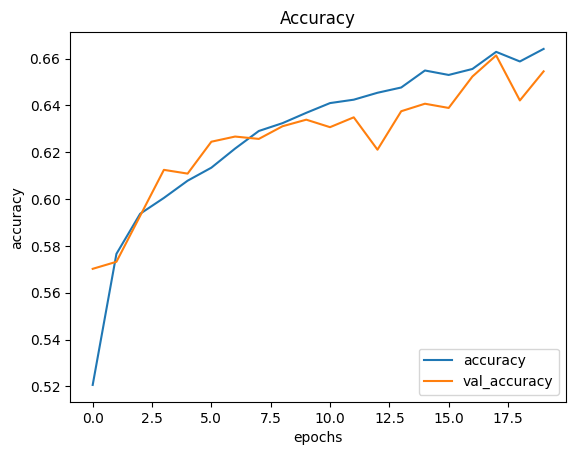

In [15]:
#Comparing the accuracy of training and testing
plt.plot(fit.history['binary_accuracy'])
plt.plot(fit.history['val_binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['accuracy','val_accuracy'],loc='lower right')

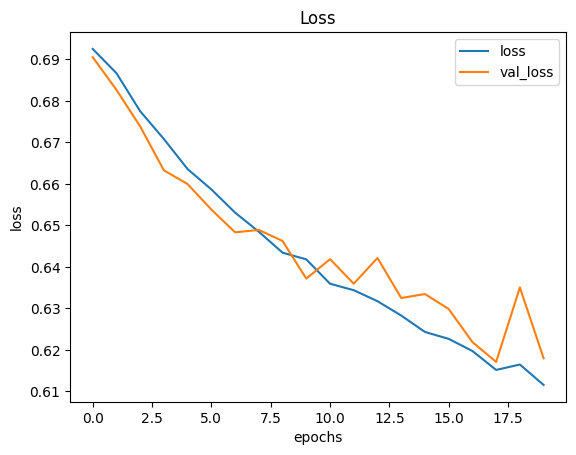

In [16]:
#Comparing the loss of training and testing
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend(labels=['loss','val_loss'],loc='upper right')

156/156 [==============================] - 15s 97ms/step


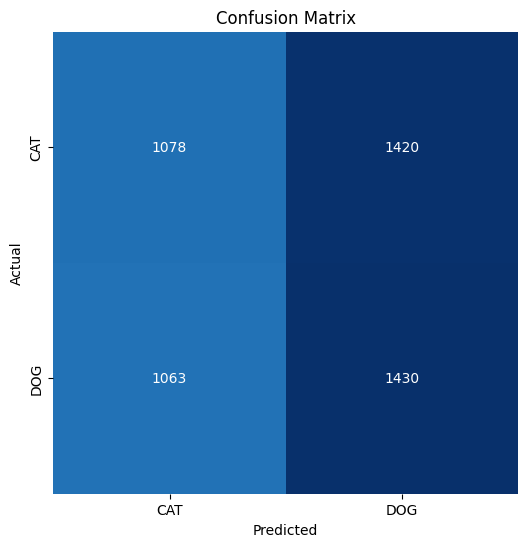

In [17]:
#Confusion matrix
predictions = (model.predict(val_ds) >= 0.5).astype(np.int)

conf= confusion_matrix(val_ds.labels, predictions, labels=[0, 1])
clar = classification_report(val_ds.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(conf, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
#Classification report
print(clar)

              precision    recall  f1-score   support

         CAT       0.50      0.43      0.46      2498
         DOG       0.50      0.57      0.54      2493

    accuracy                           0.50      4991
   macro avg       0.50      0.50      0.50      4991
weighted avg       0.50      0.50      0.50      4991



# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [19]:
#Building the model by Decreasing one layer
model5=Sequential()

model5.add(Flatten())

model5.add((Dense(units=2048,activation='relu')))
model5.add(Dense(units = 1024, activation='relu'))
model5.add((Dense(units=512,activation='relu')))
model5.add(Dense(units = 256, activation='relu'))
model5.add((Dense(units=128,activation='relu')))
model5.add((Dense(units=64,activation='relu')))
model5.add((Dense(units=32,activation='relu')))
model5.add((Dense(units=16,activation='relu')))
model5.add((Dense(units=8,activation='relu')))
model5.add((Dense(units=4,activation='relu')))
#model5.add((Dense(units=2,activation='relu')))  --Decreased layer
model5.add(Dense(units = 1, activation='sigmoid'))

In [20]:
#Compiling the model with Stochastic Gradient Descent Optimizer
model5.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = [metrics.binary_accuracy])

In [21]:
#Training the model
fit5 = model5.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
624/624 [==============================] - 79s 124ms/step - loss: 0.6920 - binary_accuracy: 0.5279 - val_loss: 0.6902 - val_binary_accuracy: 0.5584
Epoch 2/20
624/624 [==============================] - 77s 123ms/step - loss: 0.6868 - binary_accuracy: 0.5715 - val_loss: 0.6877 - val_binary_accuracy: 0.5492
Epoch 3/20
624/624 [==============================] - 76s 121ms/step - loss: 0.6783 - binary_accuracy: 0.5915 - val_loss: 0.6726 - val_binary_accuracy: 0.6035
Epoch 4/20
624/624 [==============================] - 75s 120ms/step - loss: 0.6681 - binary_accuracy: 0.6081 - val_loss: 0.6625 - val_binary_accuracy: 0.6085
Epoch 5/20
624/624 [==============================] - 75s 120ms/step - loss: 0.6589 - binary_accuracy: 0.6117 - val_loss: 0.6807 - val_binary_accuracy: 0.5975
Epoch 6/20
624/624 [==============================] - 77s 123ms/step - loss: 0.6504 - binary_accuracy: 0.6249 - val_loss: 0.6529 - val_binary_accuracy: 0.6189
Epoch 7/20
624/624 [==========================

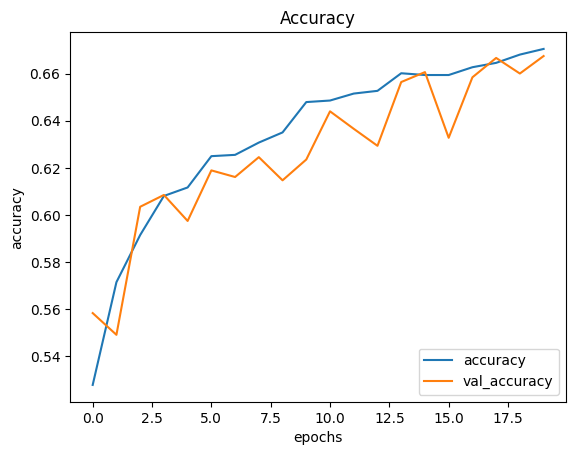

In [22]:
#Comparing the accuracy of training and testing
plt.plot(fit5.history['binary_accuracy'])
plt.plot(fit5.history['val_binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['accuracy','val_accuracy'],loc='lower right')

In [23]:
#Building the model by Increasing one layer
model6=Sequential()

model6.add(Flatten())

model6.add((Dense(units=2048,activation='relu')))
model6.add(Dense(units = 1024, activation='relu'))
model6.add((Dense(units=512,activation='relu')))
model6.add(Dense(units = 256, activation='relu'))
model6.add((Dense(units=128,activation='relu')))
model6.add((Dense(units=64,activation='relu')))
model6.add((Dense(units=32,activation='relu')))
model6.add((Dense(units=16,activation='relu')))
model6.add((Dense(units=8,activation='relu')))
model6.add((Dense(units=4,activation='relu')))
model6.add((Dense(units=4,activation='relu')))  #Increased layer
model6.add((Dense(units=2,activation='relu')))
model6.add(Dense(units = 1, activation='sigmoid'))

In [24]:
#Compiling the model with Stochastic Gradient Descent Optimizer
model6.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = [metrics.binary_accuracy])

In [25]:
#Training the model
fit6 = model6.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
624/624 [==============================] - 83s 129ms/step - loss: 0.6927 - binary_accuracy: 0.5138 - val_loss: 0.6916 - val_binary_accuracy: 0.5310
Epoch 2/20
624/624 [==============================] - 83s 133ms/step - loss: 0.6896 - binary_accuracy: 0.5682 - val_loss: 0.6883 - val_binary_accuracy: 0.5362
Epoch 3/20
624/624 [==============================] - 77s 124ms/step - loss: 0.6814 - binary_accuracy: 0.5909 - val_loss: 0.6889 - val_binary_accuracy: 0.5263
Epoch 4/20
624/624 [==============================] - 76s 122ms/step - loss: 0.6701 - binary_accuracy: 0.5986 - val_loss: 0.6647 - val_binary_accuracy: 0.6073
Epoch 5/20
624/624 [==============================] - 74s 119ms/step - loss: 0.6629 - binary_accuracy: 0.6067 - val_loss: 0.6575 - val_binary_accuracy: 0.6051
Epoch 6/20
624/624 [==============================] - 74s 119ms/step - loss: 0.6556 - binary_accuracy: 0.6169 - val_loss: 0.6576 - val_binary_accuracy: 0.6097
Epoch 7/20
624/624 [==========================

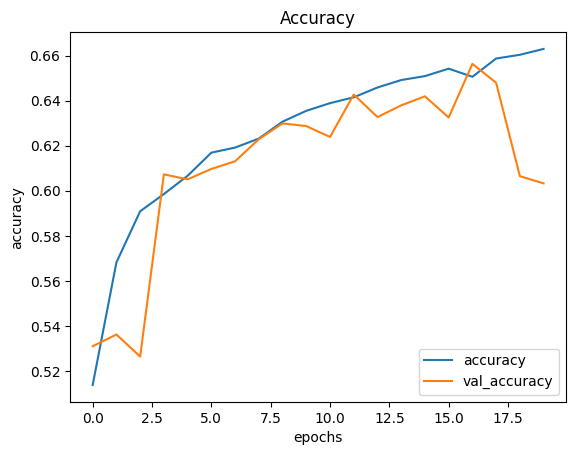

In [26]:
#Plotting the accuracy of training and testing
plt.plot(fit6.history['binary_accuracy'])
plt.plot(fit6.history['val_binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['accuracy','val_accuracy'],loc='lower right')

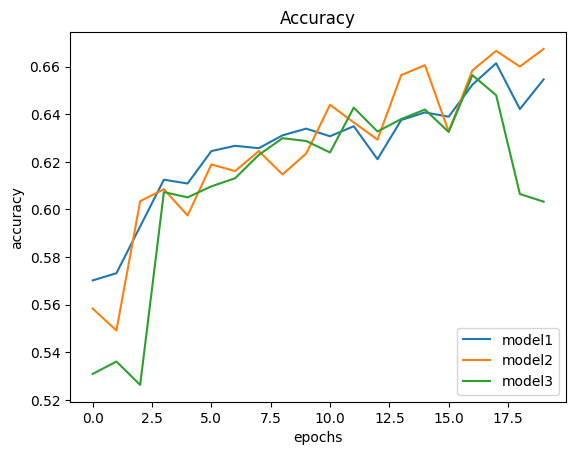

In [27]:
#Comparing the accuracy of model from Section 4.1, 8.1 and 8.2
plt.plot(fit.history['val_binary_accuracy'])
plt.plot(fit5.history['val_binary_accuracy'])
plt.plot(fit6.history['val_binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['model1','model2','model3'],loc='lower right')

By analysing the above three models we can find a minimal improvement in accuracy by decreasing one layer in the architecture.

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [28]:
#Building the model with dropout ratio of 25%
model1=Sequential()

model1.add(Flatten())

model1.add((Dense(units=2048,activation='relu')))
model1.add(Dropout(0.25))
model1.add(Dense(units = 1024, activation='relu'))
model1.add(Dropout(0.25))
model1.add((Dense(units=512,activation='relu')))
model1.add(Dropout(0.25))
model1.add(Dense(units = 256, activation='relu'))
model1.add(Dropout(0.25))
model1.add((Dense(units=128,activation='relu')))
model1.add(Dropout(0.25))
model1.add((Dense(units=64,activation='relu')))
model1.add(Dropout(0.25))
model1.add((Dense(units=32,activation='relu')))
model1.add(Dropout(0.25))
model1.add((Dense(units=16,activation='relu')))
model1.add(Dropout(0.25))
model1.add((Dense(units=8,activation='relu')))
model1.add(Dropout(0.25))
model1.add((Dense(units=4,activation='relu')))
model1.add(Dropout(0.25))
model1.add((Dense(units=2,activation='relu')))
model1.add(Dropout(0.25))
model1.add(Dense(units = 1, activation='sigmoid'))

#Compiling the model with Stochastic Gradient Descent Optimizer
model1.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = [metrics.binary_accuracy])

#Training the model
fit1 = model1.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
624/624 [==============================] - 76s 119ms/step - loss: 0.6952 - binary_accuracy: 0.4934 - val_loss: 0.6931 - val_binary_accuracy: 0.5005
Epoch 2/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6937 - binary_accuracy: 0.4987 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 3/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6934 - binary_accuracy: 0.4974 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 4/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6932 - binary_accuracy: 0.5007 - val_loss: 0.6931 - val_binary_accuracy: 0.4995
Epoch 5/20
624/624 [==============================] - 74s 119ms/step - loss: 0.6933 - binary_accuracy: 0.4920 - val_loss: 0.6931 - val_binary_accuracy: 0.4995
Epoch 6/20
624/624 [==============================] - 90s 144ms/step - loss: 0.6933 - binary_accuracy: 0.4980 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 7/20
624/624 [==========================

From the above report, we can infer that useful informations are dropped while using dropout ratio which results in poor accuracy.

In [29]:
#Building the model with Dropout ratio of 25% and L2 regulariser with factor 1e−04
model2=Sequential()

model2.add(Flatten())

model2.add((Dense(units=2048,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add(Dense(units = 1024, activation='relu',kernel_regularizer = regularizers.l2(0.0001)))
model2.add(Dropout(0.25))
model2.add((Dense(units=512,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add(Dense(units = 256, activation='relu',kernel_regularizer = regularizers.l2(0.0001)))
model2.add(Dropout(0.25))
model2.add((Dense(units=128,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add((Dense(units=64,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add((Dense(units=32,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add((Dense(units=16,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add((Dense(units=8,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add((Dense(units=4,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add((Dense(units=2,activation='relu',kernel_regularizer = regularizers.l2(0.0001))))
model2.add(Dropout(0.25))
model2.add(Dense(units = 1, activation='sigmoid'))

#Compiling the model with Stochastic Gradient Descent Optimizer
model2.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = [metrics.binary_accuracy])

#Training the model
fit2 = model2.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
624/624 [==============================] - 78s 121ms/step - loss: 1.2136 - binary_accuracy: 0.5003 - val_loss: 1.2107 - val_binary_accuracy: 0.4995
Epoch 2/20
624/624 [==============================] - 95s 152ms/step - loss: 1.2103 - binary_accuracy: 0.5036 - val_loss: 1.2094 - val_binary_accuracy: 0.4995
Epoch 3/20
624/624 [==============================] - 81s 130ms/step - loss: 1.2090 - binary_accuracy: 0.4987 - val_loss: 1.2081 - val_binary_accuracy: 0.4995
Epoch 4/20
624/624 [==============================] - 79s 127ms/step - loss: 1.2077 - binary_accuracy: 0.4974 - val_loss: 1.2068 - val_binary_accuracy: 0.5005
Epoch 5/20
624/624 [==============================] - 75s 121ms/step - loss: 1.2061 - binary_accuracy: 0.4927 - val_loss: 1.2055 - val_binary_accuracy: 0.5005
Epoch 6/20
624/624 [==============================] - 75s 121ms/step - loss: 1.2050 - binary_accuracy: 0.4994 - val_loss: 1.2042 - val_binary_accuracy: 0.5005
Epoch 7/20
624/624 [==========================

From the above report, we can infer that regularisation is not needed for the given dataset as it does not overfits the model.

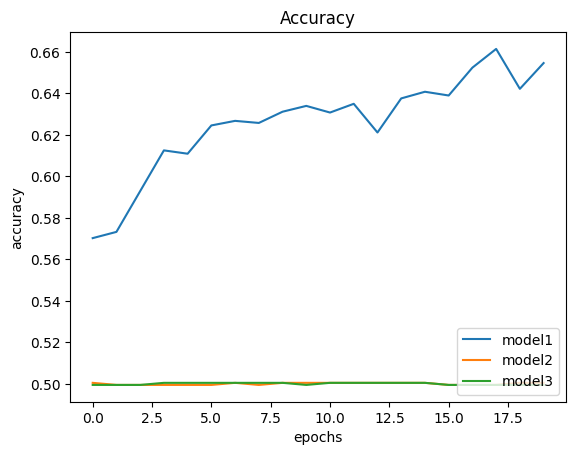

In [30]:
#Comparing the accuracy of testing dataset of model from Section 4.1, 9.1 and 9.2
plt.plot(fit.history['val_binary_accuracy'])
plt.plot(fit1.history['val_binary_accuracy'])
plt.plot(fit2.history['val_binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['model1','model2','model3'],loc='lower right')

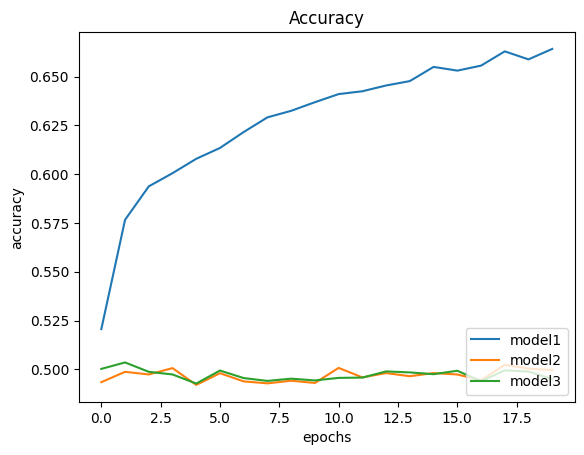

In [31]:
#Comparing the accuracy of training dataset of model from Section 4.1, 8.1 and 8.2
plt.plot(fit.history['binary_accuracy'])
plt.plot(fit1.history['binary_accuracy'])
plt.plot(fit2.history['binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['model1','model2','model3'],loc='lower right')

From the above two graph, it can been seen that the model1(model from section 4.1) works well for both training and testing data.It means that the model neither overfits nor underfits.Therefore by introducing the drop out ration and l2 regularisation will decrease the accuracy as shown in above graph.

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [32]:
#Building the model
model3=Sequential()

model3.add(Flatten())

model3.add((Dense(units=2048,activation='relu')))
model3.add(Dense(units = 1024, activation='relu'))
model3.add((Dense(units=512,activation='relu')))
model3.add(Dense(units = 256, activation='relu'))
model3.add((Dense(units=128,activation='relu')))
model3.add((Dense(units=64,activation='relu')))
model3.add((Dense(units=32,activation='relu')))
model3.add((Dense(units=16,activation='relu')))
model3.add((Dense(units=8,activation='relu')))
model3.add((Dense(units=4,activation='relu')))
model3.add((Dense(units=2,activation='relu')))
model3.add(Dense(units = 1, activation='sigmoid'))

#Compiling the model with RMSprop Optimizer
model3.compile(loss = 'binary_crossentropy', optimizer = 'RMSProp', metrics = [metrics.binary_accuracy])

#Training the model
fit3 = model3.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
624/624 [==============================] - 78s 119ms/step - loss: 0.6932 - binary_accuracy: 0.4971 - val_loss: 0.6931 - val_binary_accuracy: 0.5005
Epoch 2/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6932 - binary_accuracy: 0.4996 - val_loss: 0.6931 - val_binary_accuracy: 0.4995
Epoch 3/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6932 - binary_accuracy: 0.4945 - val_loss: 0.6931 - val_binary_accuracy: 0.5005
Epoch 4/20
624/624 [==============================] - 74s 118ms/step - loss: 0.6932 - binary_accuracy: 0.4962 - val_loss: 0.6932 - val_binary_accuracy: 0.5005
Epoch 5/20
624/624 [==============================] - 74s 119ms/step - loss: 0.6932 - binary_accuracy: 0.4969 - val_loss: 0.6932 - val_binary_accuracy: 0.5005
Epoch 6/20
624/624 [==============================] - 75s 120ms/step - loss: 0.6932 - binary_accuracy: 0.4981 - val_loss: 0.6931 - val_binary_accuracy: 0.5005
Epoch 7/20
624/624 [==========================

In [33]:
#Building the model
model4=Sequential()

model4.add(Flatten())

model4.add((Dense(units=2048,activation='relu')))
model4.add(Dense(units = 1024, activation='relu'))
model4.add((Dense(units=512,activation='relu')))
model4.add(Dense(units = 256, activation='relu'))
model4.add((Dense(units=128,activation='relu')))
model4.add((Dense(units=64,activation='relu')))
model4.add((Dense(units=32,activation='relu')))
model4.add((Dense(units=16,activation='relu')))
model4.add((Dense(units=8,activation='relu')))
model4.add((Dense(units=4,activation='relu')))
model4.add((Dense(units=2,activation='relu')))
model4.add(Dense(units = 1, activation='sigmoid'))

#Compiling the model with Adam Optimizer
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = [metrics.binary_accuracy])

#Training the model
fit4 = model4.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
624/624 [==============================] - 86s 130ms/step - loss: 0.6939 - binary_accuracy: 0.5001 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 2/20
624/624 [==============================] - 76s 121ms/step - loss: 0.6932 - binary_accuracy: 0.4929 - val_loss: 0.6931 - val_binary_accuracy: 0.5005
Epoch 3/20
624/624 [==============================] - 75s 120ms/step - loss: 0.6932 - binary_accuracy: 0.5006 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 4/20
624/624 [==============================] - 75s 120ms/step - loss: 0.6932 - binary_accuracy: 0.4965 - val_loss: 0.6931 - val_binary_accuracy: 0.4995
Epoch 5/20
624/624 [==============================] - 75s 121ms/step - loss: 0.6932 - binary_accuracy: 0.4993 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 6/20
624/624 [==============================] - 78s 124ms/step - loss: 0.6932 - binary_accuracy: 0.4982 - val_loss: 0.6931 - val_binary_accuracy: 0.5005
Epoch 7/20
624/624 [==========================

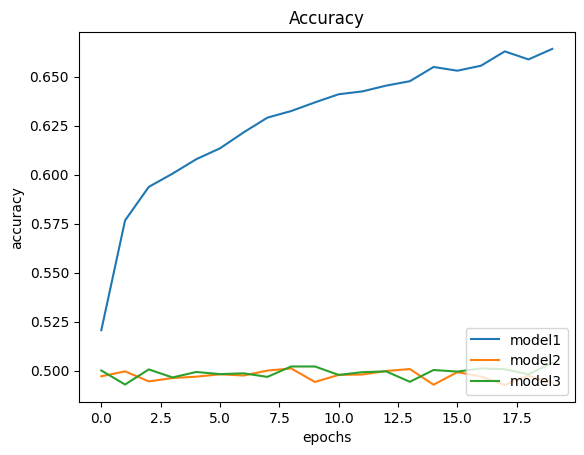

In [34]:
#Comparing the accuracy training dataset of model from Section 4.1, 10.1 and 10.2
plt.plot(fit.history['binary_accuracy'])
plt.plot(fit3.history['binary_accuracy'])
plt.plot(fit4.history['binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['model1','model2','model3'],loc='lower right')

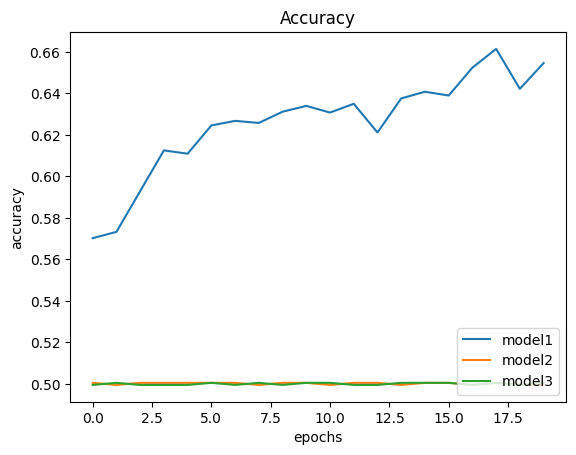

In [35]:
#Comparing the accuracy testing dataset of model from Section 4.1, 10.1 and 10.2
plt.plot(fit.history['val_binary_accuracy'])
plt.plot(fit3.history['val_binary_accuracy'])
plt.plot(fit4.history['val_binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['model1','model2','model3'],loc='lower right')

From the above two graph,we can infer that Stochastic gradient descent is best fits for given dataset among Stochastic gradient descent, RMSprop, Adam.

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


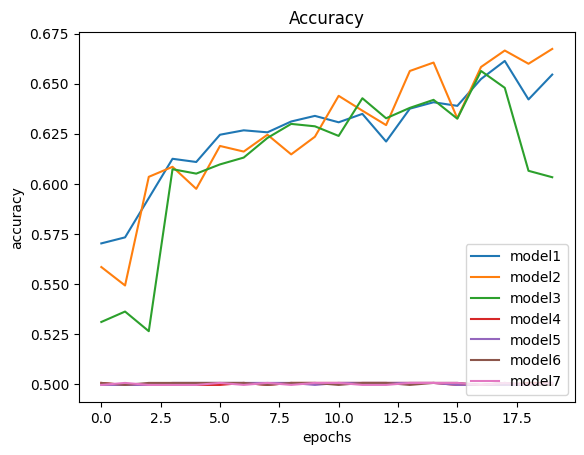

In [36]:
#Comparing the accuracy testing dataset of model from Section 4.1, 5.2, 8, 9, and 10.
plt.plot(fit.history['val_binary_accuracy'])
plt.plot(fit5.history['val_binary_accuracy'])
plt.plot(fit6.history['val_binary_accuracy'])
plt.plot(fit1.history['val_binary_accuracy'])
plt.plot(fit2.history['val_binary_accuracy'])
plt.plot(fit3.history['val_binary_accuracy'])
plt.plot(fit4.history['val_binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['model1','model2','model3','model4','model5','model6','model7'],loc='lower right')


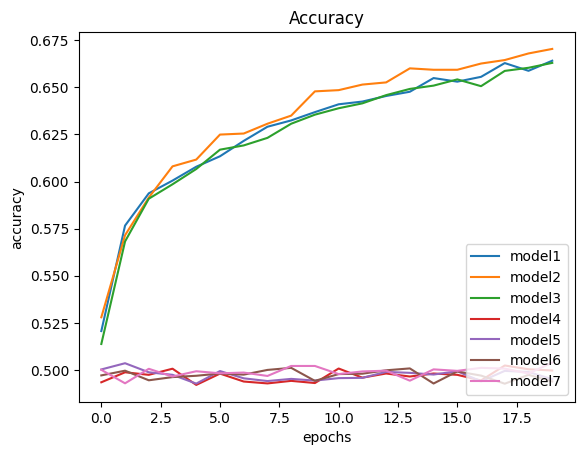

In [37]:
#Comparing the accuracy testing dataset of model from Section 4.1, 5.2, 8, 9, and 10.
plt.plot(fit.history['binary_accuracy'])
plt.plot(fit5.history['binary_accuracy'])
plt.plot(fit6.history['binary_accuracy'])
plt.plot(fit1.history['binary_accuracy'])
plt.plot(fit2.history['binary_accuracy'])
plt.plot(fit3.history['binary_accuracy'])
plt.plot(fit4.history['binary_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['model1','model2','model3','model4','model5','model6','model7'],loc='lower right')

**COMPARISION WITH RESPECT TO NUMBER OF LAYERS:**<br>
    Model shows slight improvement in accuracy while decreasing one layer.
    
    
**COMPARISION WITH RESPECT TO REGULARIZATION:**<br>
    Since the model from section 4.1 does not show any overfitting or underfitting regularization is not needed.


**COMPARISION WITH RESPECT TO OPTIMIZER:**<br>
     Among Stochastic gradient descent,RMSprop and Adam optimizer, Stochastic gradient descent is better for the given dataset.
     
     
By comparing the seven models from the above two graphs, we can conclude that model 2(section 8.1-decreasing layer) performs well.
